# Mount Drive

In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Imports

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import plotnine
from plotnine import *
from plotnine.data import *
import seaborn as sns

# Input Data

In [110]:
dailyActivity = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bellabeat/Data/dailyActivity_merged.csv")
dailyCalories = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bellabeat/Data/dailyCalories_merged.csv")
dailyIntensities = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bellabeat/Data/dailyIntensities_merged.csv")
dailySteps = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bellabeat/Data/dailySteps_merged.csv")
sleepDay = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bellabeat/Data/sleepDay_merged.csv")
weightLogInfo = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bellabeat/Data/weightLogInfo_merged.csv")

# Combine Input data files

In [ ]:
dailyActivity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [85]:
sleepDay.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [88]:
merge1 = dailyActivity.merge(dailyCalories, on = ("Id","Calories"))

In [89]:
merge2 = dailyIntensities.merge(dailyIntensities, on= ("Id","ActivityDay","SedentaryMinutes", "LightlyActiveMinutes","FairlyActiveMinutes","VeryActiveMinutes", "SedentaryActiveDistance", "LightActiveDistance", "ModeratelyActiveDistance", "VeryActiveDistance"))

In [90]:
merge = merge1.merge(merge2, on =("Id","ActivityDay","SedentaryMinutes", "LightlyActiveMinutes","FairlyActiveMinutes","VeryActiveMinutes", "SedentaryActiveDistance", "LightActiveDistance", "ModeratelyActiveDistance", "VeryActiveDistance"))

In [91]:
daily = merge.merge(sleepDay, on = "Id")

In [ ]:
daily.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActivityDay,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,4/12/2016,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/12/2016,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,4/12/2016,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/12/2016,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,4/12/2016,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/12/2016,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,4/12/2016,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/12/2016,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,4/12/2016,4/17/2016 12:00:00 AM,1,700,712


# Raw data input

In [ ]:
daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15901 entries, 0 to 15900
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        15901 non-null  int64  
 1   ActivityDate              15901 non-null  object 
 2   TotalSteps                15901 non-null  int64  
 3   TotalDistance             15901 non-null  float64
 4   TrackerDistance           15901 non-null  float64
 5   LoggedActivitiesDistance  15901 non-null  float64
 6   VeryActiveDistance        15901 non-null  float64
 7   ModeratelyActiveDistance  15901 non-null  float64
 8   LightActiveDistance       15901 non-null  float64
 9   SedentaryActiveDistance   15901 non-null  float64
 10  VeryActiveMinutes         15901 non-null  int64  
 11  FairlyActiveMinutes       15901 non-null  int64  
 12  LightlyActiveMinutes      15901 non-null  int64  
 13  SedentaryMinutes          15901 non-null  int64  
 14  Calori

In [ ]:
daily.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,1.590100e+04,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000
mean,5.116919e+09,6351.012138,4.486880,4.481426,0.096494,1.094280,0.572868,2.771094,0.000528,18.756996,13.576442,156.408025,938.631658,2220.168291,1.115716,417.299164,456.068109
std,2.184244e+09,5187.657882,3.718941,3.711934,0.491847,1.787582,0.966130,2.212866,0.006917,32.425740,21.584289,119.173005,354.396671,711.184059,0.355114,123.067587,139.639428
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,58.000000,61.000000
25%,4.020333e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,687.000000,1693.000000,1.000000,360.000000,402.000000
50%,4.702922e+09,6393.000000,4.480000,4.480000,0.000000,0.000000,0.110000,2.860000,0.000000,0.000000,3.000000,171.000000,781.000000,2013.000000,1.000000,427.000000,459.000000
75%,6.962181e+09,10460.000000,7.390000,7.390000,0.000000,1.740000,0.790000,4.480000,0.000000,28.000000,19.000000,240.000000,1440.000000,2643.000000,1.000000,490.000000,530.000000
max,8.792010e+09,22988.000000,17.950001,17.950001,4.942142,13.400000,6.480000,10.300000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,3.000000,796.000000,961.000000


In [ ]:
daily.head(3)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActivityDay,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,4/12/2016,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/12/2016,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,4/12/2016,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/12/2016,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,4/12/2016,4/15/2016 12:00:00 AM,1,412,442


# Missing Data

In [93]:
daily.isna().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
ActivityDay                 0
SleepDay                    0
TotalSleepRecords           0
TotalMinutesAsleep          0
TotalTimeInBed              0
dtype: int64

In [ ]:
daily.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
ActivityDay                  object
SleepDay                     object
TotalSleepRecords             int64
TotalMinutesAsleep            int64
TotalTimeInBed                int64
dtype: object

# Data Transform

In [ ]:
daily['SedentaryMinutes'].describe()

count    15901.000000
mean       938.631658
std        354.396671
min          0.000000
25%        687.000000
50%        781.000000
75%       1440.000000
max       1440.000000
Name: SedentaryMinutes, dtype: float64

In [ ]:
daily['VeryActiveMinutes'].describe()

count    15901.000000
mean        18.756996
std         32.425740
min          0.000000
25%          0.000000
50%          0.000000
75%         28.000000
max        210.000000
Name: VeryActiveMinutes, dtype: float64

In [ ]:
daily.to_csv('/content/drive/MyDrive/Colab Notebooks/Bellabeat/Data/daily_merged.csv')

# Visualization

/usr/local/lib/python3.7/dist-packages/plotnine/stats/smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


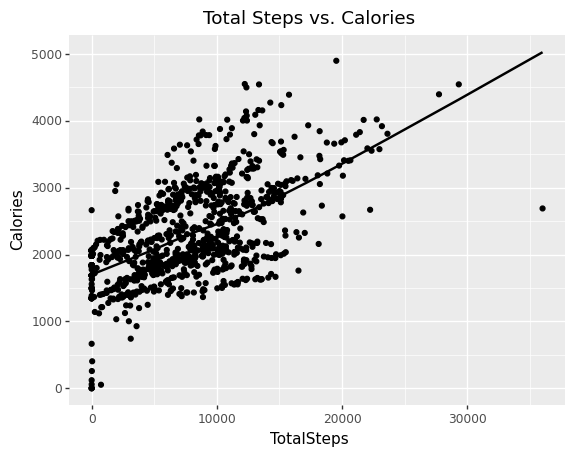

<ggplot: (8734077026513)>

In [14]:
(
    ggplot(dailyActivity, aes(x= 'TotalSteps', y= 'Calories'))
    + geom_point()
    + geom_smooth()
    + labs(title="Total Steps vs. Calories")
)

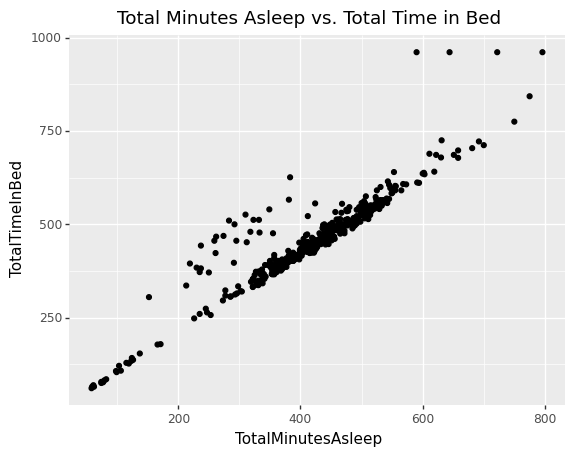

<ggplot: (8734077026925)>

In [19]:
(
    ggplot(sleepDay, aes(x='TotalMinutesAsleep', y= 'TotalTimeInBed')) 
    + geom_point()
    + labs(title="Total Minutes Asleep vs. Total Time in Bed")
)

In [23]:
dailyIntensities.head()

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71


In [31]:
HourlyIntensities = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bellabeat/Data/hourlyIntensities_merged.csv")

In [119]:
HourlyIntensities.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity,Date,Time
0,1503960366,4/12/2016 0:00,20,0.333333,4/12/2016,0:00
1,1503960366,4/12/2016 1:00,8,0.133333,4/12/2016,1:00
2,1503960366,4/12/2016 2:00,7,0.116667,4/12/2016,2:00
3,1503960366,4/12/2016 3:00,0,0.000000,4/12/2016,3:00
4,1503960366,4/12/2016 4:00,0,0.000000,4/12/2016,4:00


In [145]:
new_Intensities = HourlyIntensities.groupby(['Time']).mean(HourlyIntensities['AverageIntensity'].mean())

In [146]:
new_Intensities.head()

,Id,TotalIntensity,AverageIntensity
Time,,,
0:00,4.846554e+09,2.129550,0.035493
10:00,4.844647e+09,17.643703,0.294062
11:00,4.848036e+09,16.921251,0.282021
12:00,4.847948e+09,19.847072,0.330785
13:00,4.845518e+09,18.775244,0.312921


In [150]:
new_Intensities.dtypes

Id                  float64
TotalIntensity      float64
AverageIntensity    float64
dtype: object

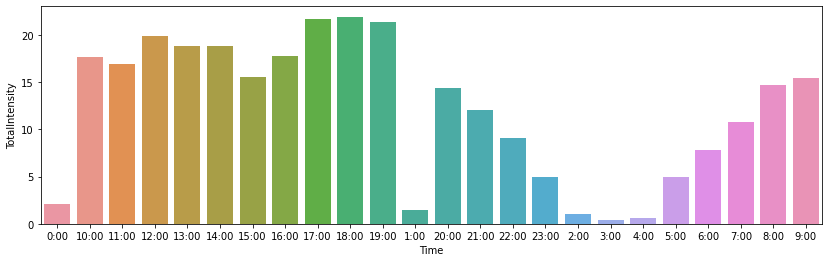

In [158]:
fig_dims = (14, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x='Time',y='TotalIntensity', data=HourlyIntensities.groupby(['Time']).mean(HourlyIntensities['AverageIntensity'].mean()).reset_index())


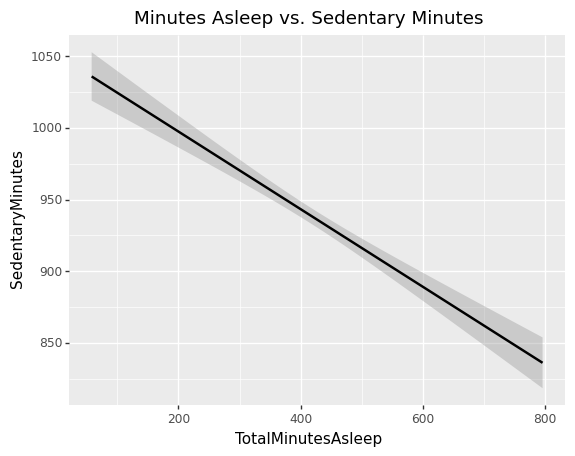

<ggplot: (8734071216505)>

In [147]:
(
    ggplot(daily, aes(x='TotalMinutesAsleep', y='SedentaryMinutes')) 
    + geom_smooth() 
    + labs(title="Minutes Asleep vs. Sedentary Minutes")
)